In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from transform_factory import resize_322, center_crop_224
from captum.attr import visualization as viz

In [14]:
seed = 0
expl_method = "LayerXAct"
data_num = 1

In [15]:
with open(f"./val_seed_{seed}.npy", "rb") as f:
    filepath_list = np.load(f)

for filepath in filepath_list[data_num - 1:data_num]:
    img_name = os.path.basename(filepath)
    print(img_name)

    results_path = f"results/orig_224_true_322_sigma_0.5_rot_360/val_seed_{seed}_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/{img_name}_expl_{expl_method}_sample_2000_sigma_0.05_seed_{seed}_results.pkl"

    with open(results_path, "rb") as f:
        results = np.load(f, allow_pickle=True)

ILSVRC2012_val_00024718.JPEG


In [16]:
for res in results:
    print(res['zero_contain_rate'])

0.33432318239795916
0.2573142538265306
0.21462452168367346
0.17506377551020408
0.16151147959183673
0.15114795918367346
0.14178093112244897
0.1351044323979592
0.13014190051020408
0.12408322704081633
0.11698820153061225
0.10935507015306123
0.10118383290816327
0.09193638392857142
0.08227040816326531
0.07242506377551021
0.05976961096938776
0.04107541454081633
0.027782206632653062


tensor(0.9508)


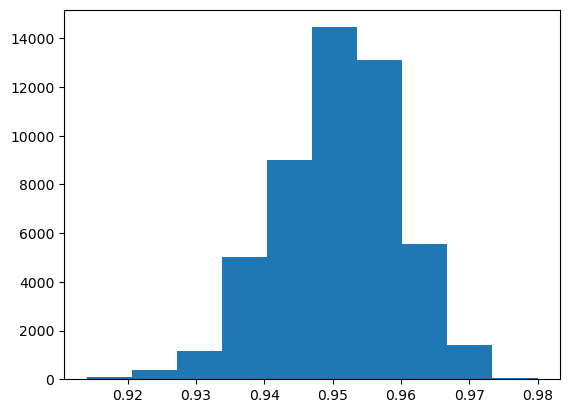

In [17]:
plt.hist(results[0]['coverage_prob'].flatten())

print(results[0]['coverage_prob'].flatten().mean())

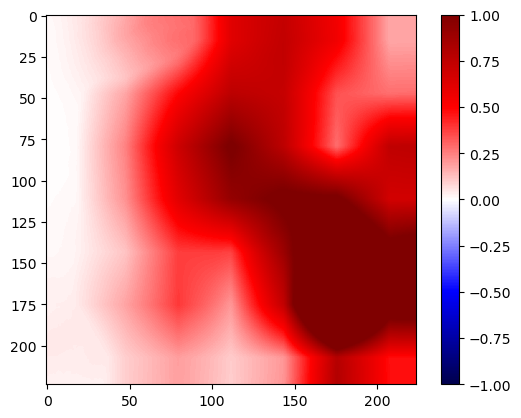

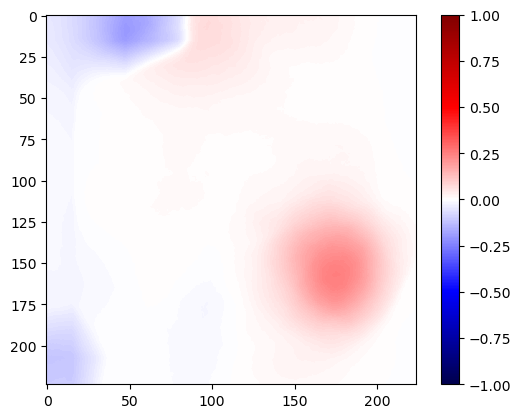

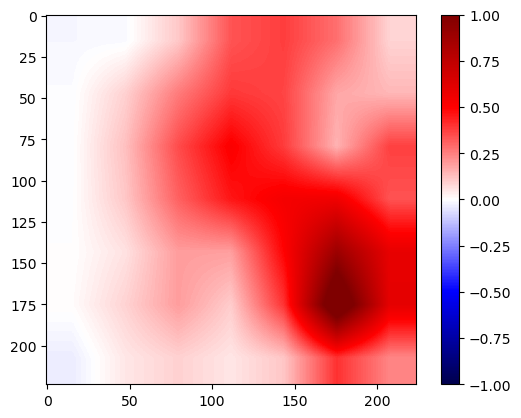

In [18]:
plt.imshow(results[0]['conf_high'].squeeze(), cmap="seismic")
plt.clim(-1, 1)
plt.colorbar()
plt.show()

plt.imshow(results[0]['conf_low'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()

plt.imshow(results[0]['orig_expl'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()


In [7]:
_ = viz.visualize_image_attr(np.transpose(results[0]['conf_high'], (1,2,0)), np.transpose(orig_img), method='blended_heat_map', sign="all")

NameError: name 'orig_img' is not defined

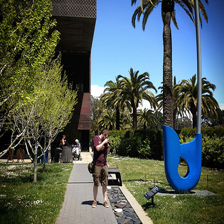

In [13]:
center_crop_224(resize_322(Image.open(filepath_list[data_num])))


In [17]:
orig_224_true_224 = results[0]['conf_high']

In [18]:
orig_224_true_322 = results[0]['conf_high']

In [19]:
print(orig_224_true_224)

tensor([[[0.3391, 0.3425, 0.3454,  ..., 0.0367, 0.0364, 0.0374],
         [0.3358, 0.3391, 0.3421,  ..., 0.0375, 0.0368, 0.0384],
         [0.3340, 0.3358, 0.3397,  ..., 0.0389, 0.0389, 0.0389],
         ...,
         [0.1699, 0.1737, 0.1743,  ..., 0.6119, 0.6119, 0.6116],
         [0.1678, 0.1727, 0.1748,  ..., 0.6120, 0.6119, 0.6118],
         [0.1690, 0.1720, 0.1736,  ..., 0.6133, 0.6124, 0.6123]]])


In [20]:
print(orig_224_true_322)

tensor([[[0.3391, 0.3425, 0.3454,  ..., 0.0367, 0.0364, 0.0374],
         [0.3358, 0.3391, 0.3421,  ..., 0.0375, 0.0368, 0.0384],
         [0.3340, 0.3358, 0.3397,  ..., 0.0389, 0.0389, 0.0389],
         ...,
         [0.1699, 0.1737, 0.1743,  ..., 0.6119, 0.6119, 0.6116],
         [0.1678, 0.1727, 0.1748,  ..., 0.6120, 0.6119, 0.6118],
         [0.1690, 0.1720, 0.1736,  ..., 0.6133, 0.6124, 0.6123]]])


In [21]:
print((orig_224_true_224 - orig_224_true_322).mean())

tensor(0.)


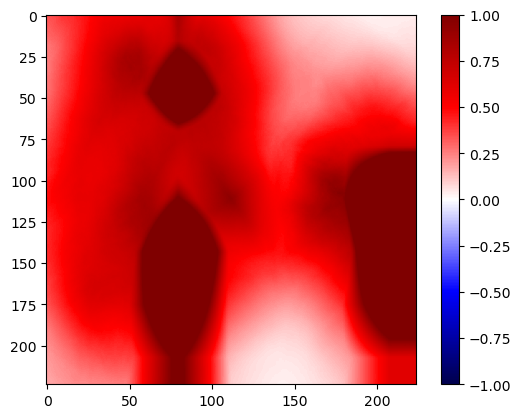

In [22]:
plt.imshow(orig_224_true_224.squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()


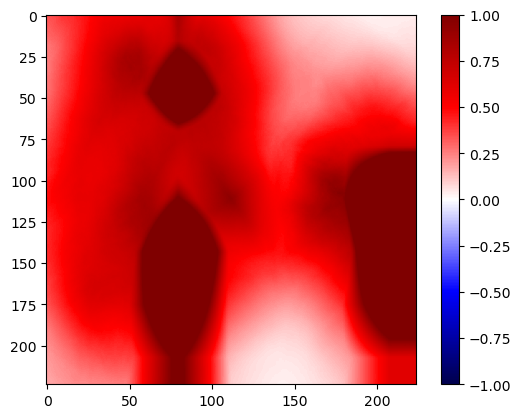

In [23]:
plt.imshow(orig_224_true_322.squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()